In [28]:
from __future__ import print_function

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import six

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'figures' #'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure4_voyages', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-08-26 17:20:57	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/datapackage.json
2016-08-26 17:20:57	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2016-08-26 17:21:27 	Initializing Study
2016-08-26 17:21:27 	Initializing Predictor configuration manager for Study
2016-08-26 17:21:27	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-08-26 17:21:27	Added ExtraTreesClassifier to default predictors
2016-08-26 17:21:27	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-08-26 17:21:27	Added ExtraTreesRegressor to default predictors
2016-08-26 17:21:27	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-08-26 17:21:27	Added GradientBoostingClassifier to defa

Error loading species hg19 data: HTTP Error 404: Not Found

In [2]:
singles = study.expression.singles
print(singles.shape)
singles.head()

(206, 18594)


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,0,3.691144,0.000000,0.000000,2.748821,0,1.722466,0,0.000000,...,0.080647,0.291587,1.017003,0.080984,6.998972,0.153573,0.119524,0.663759,0.000000,2.905205
CVN_02,5.338678,0,0.000000,0.000000,0.113387,0.000000,0,0.503710,0,1.451580,...,0.495262,0.000000,0.568696,0.000000,0.000000,0.000000,0.116144,0.000000,0.087565,3.746504
CVN_03,0.146438,0,0.000000,1.262223,0.000000,0.000000,0,0.291712,0,0.000000,...,0.000000,0.000000,0.330164,0.263555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,0,2.593897,0.000000,0.000000,6.688600,0,8.181010,0,1.155126,...,0.562974,0.000000,0.223287,0.140263,0.195424,0.000000,1.601383,0.000000,0.205765,1.533982
CVN_05,7.531459,0,5.124018,0.262705,4.346173,0.397903,0,6.262296,0,0.614197,...,0.353069,0.000000,0.646603,0.260183,6.631383,0.000000,0.096939,0.166200,0.133075,0.553417


In [61]:
rbp_ids = study.expression.feature_data.query('gerstberger2014_rbp_target_mrna').index
# rbp_ids = rbp_ids.inter

rbps = singles.loc[:, rbp_ids].dropna(how='all', axis=1)
rbps = rbps.rename(columns=study.expression.feature_data.loc[rbps.columns, 'gene_name'])
print(rbps.shape)
rbps.head()

(206, 617)


,RBM5,RBM6,UPF1,POLR2J,DHX33,GCFC2,LUC7L,CSDE1,AKAP8L,PTBP1,...,L1TD1,ISY1,EIF6,RBM12,EIF5AL1,PRKDC,MEX3A,DND1,RP11-529K1.3,LUC7L2
CVN_01,9.632477,7.355568,0.000000,9.270282,6.620909,6.635573,6.099283,4.832525,0.000000,0.000000,...,0,5.635442,3.038290,8.041079,0.000000,7.972421,0.000000,0,0,1.579465
CVN_02,1.910852,5.621305,0.000000,8.174082,2.162719,0.389330,7.134951,4.580972,0.000000,0.000000,...,0,1.367631,8.963380,0.000000,0.368939,3.558279,5.633004,0,0,0.000000
CVN_03,9.136361,7.099151,0.000000,0.377099,0.000000,0.403142,6.093339,8.385265,0.000000,4.474832,...,0,0.000000,6.450662,3.612967,0.187608,5.015034,6.880000,0,0,0.000000
CVN_04,7.415742,8.484946,0.942291,7.457089,5.672974,3.706861,1.254225,7.842809,0.000000,0.517420,...,0,0.000000,3.506323,0.000000,0.192557,7.674764,4.224704,0,0,4.391355
CVN_05,5.526858,8.506642,0.000000,6.809510,0.571635,0.215866,7.487106,6.825916,1.303676,3.352287,...,0,0.836093,5.179903,6.882865,0.310887,6.765751,5.110217,0,0,4.778114


In [72]:
study.supplemental.cisbp_t_statistic.head()

,upstream200nt_MN_bimodal_placental,downstream200nt_MN_bimodal_placental,upstream200nt_MN_excluded_placental,downstream200nt_MN_excluded_placental,upstream200nt_MN_included_placental,downstream200nt_MN_included_placental,upstream200nt_MN_uncategorized_placental,downstream200nt_MN_uncategorized_placental,upstream200nt_NPC_bimodal_placental,downstream200nt_NPC_bimodal_placental,...,upstream200nt_iPSC_bimodal_placental,downstream200nt_iPSC_bimodal_placental,upstream200nt_iPSC_excluded_placental,downstream200nt_iPSC_excluded_placental,upstream200nt_iPSC_included_placental,downstream200nt_iPSC_included_placental,upstream200nt_iPSC_middle_placental,downstream200nt_iPSC_middle_placental,upstream200nt_iPSC_uncategorized_placental,downstream200nt_iPSC_uncategorized_placental
RBP Motif,,,,,,,,,,,,,,,,,,,,,
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,9.773922,8.763746,4.795954,3.865158,-8.386800,-6.125987,-0.735882,-4.469174,9.318185,7.858505,...,7.974251,5.171420,7.428721,5.222785,-8.556934,-5.584638,0.203737,2.262695,1.754803,2.792677
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-8.180691,-10.528870,-1.257287,-3.050041,6.865188,8.923962,-0.918928,-7.885387,-9.858018,-13.803576,...,-4.303502,-6.865831,-4.668265,-4.452394,7.931694,8.072544,-0.265219,-0.757155,-1.123094,-9.189221
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,11.299489,9.324577,3.122422,8.590319,-10.129265,-10.461790,1.083059,-4.393504,10.518245,9.016198,...,8.598927,8.265806,9.252545,8.709587,-10.638675,-10.649338,-10.536098,-0.487599,5.943301,7.286519
M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,18.073469,13.702882,10.643815,13.299264,-17.551504,-15.811573,1.368047,0.009569,18.780338,17.767501,...,15.861790,14.981211,14.453472,14.581558,-16.942974,-17.197455,0.675730,0.113204,6.950149,7.413431
M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens,2.553233,5.596075,8.629404,3.975156,-6.750704,-5.877951,0.997941,-2.672161,2.197799,3.593859,...,-0.557489,-1.238760,8.742782,5.551199,-6.510902,-3.915456,-1.438530,-0.236097,6.437776,5.716095


In [69]:
rbp_ids_from_cisbp = np.unique(study.supplemental.cisbp_t_statistic.index.map(lambda x: x.split('_')[2]))
print(len(rbps_from_cisbp))
rbps_from_cisbp[:10]

206


,A1CF,A2BP1,ANKRD17,BRUNOL4,BRUNOL6,CELF3,CNOT4,CPEB3,CPEB4,CSDA,...,TIA1,U2AF2,YBX2,YTHDC1,ZC3H10,ZCRB1,ZFP36,ZNF638,hnRNPK,hnRNPLL
CVN_01,NaN,NaN,NaN,NaN,NaN,0,7.233485,0.000000,0.000000,NaN,...,7.026116,5.736244,NaN,NaN,NaN,NaN,NaN,5.290836,NaN,NaN
CVN_02,NaN,NaN,NaN,NaN,NaN,0,4.879603,0.000000,0.333624,NaN,...,8.690803,5.724255,NaN,NaN,NaN,NaN,NaN,3.562133,NaN,NaN
CVN_03,NaN,NaN,NaN,NaN,NaN,0,7.652487,0.428858,0.000000,NaN,...,2.690654,5.303773,NaN,NaN,NaN,NaN,NaN,7.693465,NaN,NaN
CVN_04,NaN,NaN,NaN,NaN,NaN,0,6.105268,0.000000,4.874669,NaN,...,3.425095,0.000000,NaN,NaN,NaN,NaN,NaN,5.666363,NaN,NaN
CVN_05,NaN,NaN,NaN,NaN,NaN,0,6.732688,0.000000,0.111414,NaN,...,4.482617,0.000000,NaN,NaN,NaN,NaN,NaN,9.573912,NaN,NaN
CVN_06,NaN,NaN,NaN,NaN,NaN,0,4.669258,0.000000,0.000000,NaN,...,7.843566,5.020844,NaN,NaN,NaN,NaN,NaN,8.215463,NaN,NaN
CVN_07,NaN,NaN,NaN,NaN,NaN,0,4.325689,2.565899,7.002634,NaN,...,7.357777,0.859692,NaN,NaN,NaN,NaN,NaN,6.864290,NaN,NaN
CVN_08,NaN,NaN,NaN,NaN,NaN,0,2.186473,0.000000,0.000000,NaN,...,6.854457,4.320788,NaN,NaN,NaN,NaN,NaN,7.383695,NaN,NaN
CVN_09,NaN,NaN,NaN,NaN,NaN,0,4.314043,0.000000,0.000000,NaN,...,7.645677,3.329139,NaN,NaN,NaN,NaN,NaN,7.409346,NaN,NaN
CVN_11,NaN,NaN,NaN,NaN,NaN,0,0.701317,6.665108,2.830933,NaN,...,7.268732,2.584900,NaN,NaN,NaN,NaN,NaN,7.088468,NaN,NaN


In [71]:
rbps_from_cisbp = rbps.loc[:, rbp_ids_from_cisbp].dropna(axis=1, how='all')
print(rbps_from_cisbp.shape)
rbps_from_cisbp.head()

(206, 72)


,CELF3,CNOT4,CPEB3,CPEB4,DAZAP1,EIF4B,ELAVL1,ELAVL2,ELAVL3,ENOX1,...,SRSF1,SRSF12,SRSF3,SRSF4,SRSF7,SRSF9,TARDBP,TIA1,U2AF2,ZNF638
CVN_01,0,7.233485,0.000000,0.000000,0.000000,5.163261,2.444243,0.000000,1.320773,0.139995,...,5.549024,7.083640,9.353299,0.952352,9.396547,6.873653,5.201547,7.026116,5.736244,5.290836
CVN_02,0,4.879603,0.000000,0.333624,0.000000,9.723629,4.127881,0.000000,2.163985,7.408754,...,3.866734,0.271520,9.522150,5.966842,9.548953,7.071452,4.294477,8.690803,5.724255,3.562133
CVN_03,0,7.652487,0.428858,0.000000,0.000000,9.359005,0.214760,0.099024,0.000000,0.000000,...,8.410303,0.000000,10.710512,0.000000,8.096230,2.281369,6.074763,2.690654,5.303773,7.693465
CVN_04,0,6.105268,0.000000,4.874669,4.934498,7.885165,1.701833,0.499377,2.862622,0.000000,...,5.115515,0.714159,8.782503,8.506716,8.668910,5.974415,7.119329,3.425095,0.000000,5.666363
CVN_05,0,6.732688,0.000000,0.111414,4.821812,8.586082,4.824111,4.835903,0.632811,0.000000,...,5.947478,5.224788,9.623903,5.881956,9.567581,7.794448,8.485026,4.482617,0.000000,9.573912


In [99]:
min_cells = 20

In [100]:
psi = study.splicing.singles.groupby(study.sample_id_to_phenotype).apply(lambda x: x.dropna(thresh=min_cells, axis=1))
print(psi.shape)
psi.head()

(196, 8456)


,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,...,exon:chrY:15024875-15024974:+@exon:chrY:15025630-15025765:+@exon:chrY:15026476-15026561:+,exon:chrY:15026476-15026561:+@exon:chrY:15026796-15026894:+@exon:chrY:15026979-15027139:+,exon:chrY:15027542-15027686:+@exon:chrY:15027795-15027939:+@exon:chrY:15028173-15028354:+,exon:chrY:15028429-15028546:+@exon:chrY:15028819-15028972:+@exon:chrY:15029315-15029454:+,exon:chrY:22744476-22744579:+@exon:chrY:22746360-22746410:+@exon:chrY:22749910-22749991:+,exon:chrY:2709527-2709668:+@exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+,exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+,exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+,exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+,exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2734903:+
sample_id,,,,,,,,,,,,,,,,,,,,,
CVN_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
CVN_02,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
CVN_03,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
CVN_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
CVN_05,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,NaN,NaN,NaN,NaN,1,1,1,1,1,1


In [101]:
var = psi.groupby(study.sample_id_to_phenotype).var()
print(var.shape)
var.head()

(3, 8456)


,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,...,exon:chrY:15024875-15024974:+@exon:chrY:15025630-15025765:+@exon:chrY:15026476-15026561:+,exon:chrY:15026476-15026561:+@exon:chrY:15026796-15026894:+@exon:chrY:15026979-15027139:+,exon:chrY:15027542-15027686:+@exon:chrY:15027795-15027939:+@exon:chrY:15028173-15028354:+,exon:chrY:15028429-15028546:+@exon:chrY:15028819-15028972:+@exon:chrY:15029315-15029454:+,exon:chrY:22744476-22744579:+@exon:chrY:22746360-22746410:+@exon:chrY:22749910-22749991:+,exon:chrY:2709527-2709668:+@exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+,exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+,exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+,exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+,exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2734903:+
phenotype,,,,,,,,,,,,,,,,,,,,,
MN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031219,0.000000,...,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.000000,0.000000,0.000000
NPC,0.000000,0.134211,NaN,NaN,NaN,NaN,NaN,NaN,0.052259,0.000048,...,NaN,NaN,NaN,NaN,0.010907,0,0.000000,0.000723,0.000000,0.000000
iPSC,0.027506,0.026042,0.120688,0.00437,0,0.047619,0.125641,0.11954,0.004267,0.000097,...,0,0,0.011891,0,0.002145,0,0.000067,0.000000,0.000003,0.000201


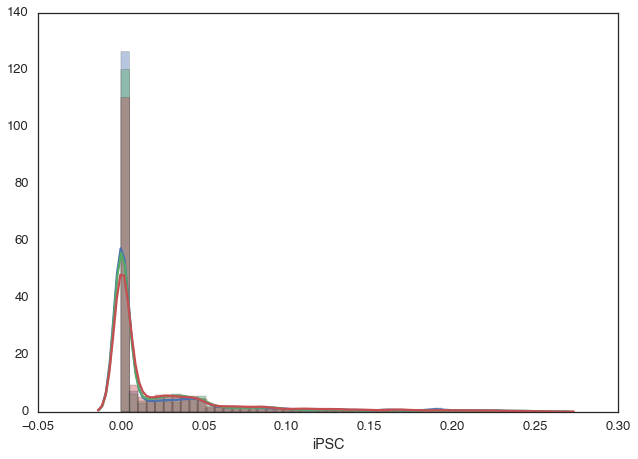

In [102]:
for phenotype, row in var.iterrows():
    sns.distplot(row.dropna())

In [103]:
psi_filtered = psi.groupby(study.sample_id_to_phenotype).apply(lambda x: x.loc[:, x.var() > 0.1])
print(psi_filtered.shape)
psi_filtered.head()

(196, 1059)


,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-,exon:chr10:104209950-104210087:+@exon:chr10:104211156-104211312:+@exon:chr10:104215094-104215184:+,exon:chr10:1094804-1095110:-@exon:chr10:1089939-1090111:-@exon:chr10:1089241-1089333:-,exon:chr10:112661296-112661370:-@exon:chr10:112660784-112660880:-@exon:chr10:112658488-112660284:-,exon:chr10:112678879-112679032:-@exon:chr10:112677879-112677971:-@exon:chr10:112661296-112661370:-,exon:chr10:114711242-114711366:+@exon:chr10:114724315-114724383:+@exon:chr10:114799784-114799885:+,exon:chr10:115933774-115933961:-@exon:chr10:115932900-115933024:-@exon:chr10:115921367-115923088:-,...,exon:chrX:13707305-13707407:+@exon:chrX:13721933-13722021:+@exon:chrX:13726840-13727473:+,exon:chrX:14891108-14891184:-@exon:chrX:14887045-14887165:-@exon:chrX:14882682-14883702:-,exon:chrX:151999541-151999661:+@exon:chrX:152000178-152000244:+@exon:chrX:152014826-152014976:+,exon:chrX:64744845-64744930:-@exon:chrX:64744444-64744494:-@exon:chrX:64743936-64744142:-,exon:chrX:64749092-64749138:-@exon:chrX:64748140-64748249:-@exon:chrX:64744845-64744930:-,exon:chrX:69509710-69509795:-@exon:chrX:69509372-69509443:-@exon:chrX:69509105-69509204:-,exon:chrX:76952065-76952192:-@exon:chrX:76949313-76949426:-@exon:chrX:76944311-76944420:-,exon:chrX:77041468-77041702:-@exon:chrX:76972608-76972720:-@exon:chrX:76954062-76954117:-,exon:chrX:78622602-78622856:-@exon:chrX:78618920-78619051:-@exon:chrX:78618439-78618636:-,exon:chrY:14813160-14813984:+@exon:chrY:14820567-14820626:+@exon:chrY:14821321-14821476:+
sample_id,,,,,,,,,,,,,,,,,,,,,
CVN_01,NaN,NaN,NaN,NaN,NaN,0.749526,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.388235,1,NaN,NaN
CVN_02,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
CVN_03,NaN,NaN,NaN,NaN,NaN,0.966330,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,0.000000,0,NaN,NaN
CVN_04,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,1.000000,1,NaN,NaN
CVN_05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


In [128]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Lasso

In [112]:
%%time
regressors = {}


for phenotype, phenotype_psi in psi_filtered.groupby(study.sample_id_to_phenotype):
    print(phenotype, phenotype_psi.shape)
    phenotype_psi = phenotype_psi.dropna(axis=1, how='all')
    phenotype_psi = phenotype_psi.dropna(axis=0, how='all')
    print('\t', phenotype, phenotype_psi.shape)

    for event_id, event in phenotype_psi.iteritems():
        event = event.dropna()
        target = event > 0.5
        key = phenotype, event_id
        phenotype_expression = rbps_from_cisbp.loc[event.index]

        regressor = LogisticRegression()
        regressor.fit(phenotype_expression.values, target.values)
        
        regressors[key] = regressor

MN (66, 1059)
	 MN (66, 286)
NPC (71, 1059)
	 NPC (71, 363)
iPSC (59, 1059)
	 iPSC (59, 710)
CPU times: user 2.55 s, sys: 2 ms, total: 2.56 s
Wall time: 2.56 s


In [138]:
%%time
regressors = {}


for phenotype, phenotype_psi in psi_filtered.groupby(study.sample_id_to_phenotype):
    print(phenotype, phenotype_psi.shape)
    phenotype_psi = phenotype_psi.dropna(axis=1, how='all')
    phenotype_psi = phenotype_psi.dropna(axis=0, how='all')
    print('\t', phenotype, phenotype_psi.shape)

    for event_id, event in phenotype_psi.iteritems():
        event = event.dropna()
#         target = event > 0.5
        key = phenotype, event_id
        phenotype_expression = rbps_from_cisbp.loc[event.index]

        regressor = LinearRegression()
        regressor.fit(phenotype_expression.values, event.values)
        
        regressors[key] = regressor

MN (66, 1059)
	 MN (66, 286)
NPC (71, 1059)
	 NPC (71, 363)
iPSC (59, 1059)
	 iPSC (59, 710)
CPU times: user 13 s, sys: 8.36 s, total: 21.4 s
Wall time: 2.68 s


In [139]:
# %%time
# all_regressorcvs = {}

# for phenotype, phenotype_psi in psi_filtered.groupby(study.sample_id_to_phenotype):
#     print(phenotype, phenotype_psi.shape)
#     phenotype_psi = phenotype_psi.dropna(axis=1, how='all')
#     phenotype_psi = phenotype_psi.dropna(axis=0, how='all')
#     print('\t', phenotype, phenotype_psi.shape)

#     for event_id, event in phenotype_psi.iteritems():
#         event = event.dropna()
#         target = event > 0.5
#         key = phenotype, event_id
#         phenotype_expression = rbps_from_cisbp.loc[event.index]

#         regressorcv = LogisticRegressionCV()
#         regressorcv.fit(phenotype_expression.values, target.values)
        
#         all_regressorcvs[key] = regressorcv

In [140]:
enah_event = study.splicing.maybe_renamed_to_feature_id('ENAH')[0]

event = enah_event

# regressor = regressors[('iPSC', event)]
# coef = pd.DataFrame(regressor.coef_, columns=rbps_from_cisbp.columns).loc[0]

# sns.distplot(coef)
# coef[coef.abs() > 0.05]

In [148]:
regressor.coef_

array([-0.0230922 ,  0.03630065, -0.00314152,  0.04625421,  0.01092468,
        0.01389817, -0.01731724,  0.01761569,  0.01813589,  0.02350767,
        0.04880975,  0.02007027,  0.01697462,  0.04073568, -0.0161738 ,
        0.03282282, -0.01204264,  0.00127076, -0.00539722, -0.03582377,
       -0.02231352,  0.03021976,  0.03162282,  0.01908119,  0.03690965,
        0.0178879 , -0.02042171, -0.03166428,  0.01588472,  0.04427518,
       -0.01997112,  0.03099954, -0.03350857,  0.05014503,  0.0174913 ,
       -0.02778782, -0.04504178, -0.0017046 ,  0.00655797, -0.02369394,
       -0.00879029, -0.06070548,  0.01226309, -0.01784475,  0.00443145,
       -0.05490748,  0.01585599, -0.02722928,  0.00655738,  0.02398057,
        0.04444876, -0.03303136,  0.01645271,  0.00104429, -0.01918485,
       -0.02978443, -0.02194858, -0.04133441,  0.01804118,  0.03321746,
       -0.03866066,  0.0209505 ,  0.06292194,  0.00448074,  0.02127418,
        0.03351371,  0.01490088, -0.01523295, -0.02814335, -0.00

In [150]:
coeffs = pd.DataFrame({key: pd.Series(value.coef_, index=rbps_from_cisbp.columns) for key, value in regressors.items()}) 

In [151]:
coeffs.head()

MN  \
       exon:chr10:104209950-104210087:+@exon:chr10:104211156-104211312:+@exon:chr10:104215094-104215184:+   
CELF3                                            0.001537                                                   
CNOT4                                           -0.002841                                                   
CPEB3                                           -0.013188                                                   
CPEB4                                           -0.015387                                                   
DAZAP1                                          -0.004503                                                   

                                                                                               \
       exon:chr10:1094804-1095110:-@exon:chr10:1089939-1090111:-@exon:chr10:1089241-1089333:-   
CELF3                                            0.009602                                       
CNOT4                                            0.020971                                       
CPEB3                                            0.007993                                       
CPEB4                                           -0.008876                                       
DAZAP1                                           0.027199                                       

                                                                                                           \
       exon:chr10:112678879-112679032:-@exon:chr10:112677879-112677971:-@exon:chr10:112661296-112661370:-   
CELF3                                           -0.010465                                                   
CNOT4                                            0.018427                                                   
CPEB3                                           -0.007585                                                   
CPEB4                                           -0.001533                                                   
DAZAP1                                          -0.018138                                                   

                                                                                                           \
       exon:chr10:116211383-116211430:-@exon:chr10:116207639-116207785:-@exon:chr10:116205071-116205162:-   
CELF3                                           -0.025894                                                   
CNOT4                                           -0.008487                                                   
CPEB3                                           -0.020425                                                   
CPEB4                                           -0.000162                                                   
DAZAP1                                          -0.016479                                                   

                                                                                                           \
       exon:chr10:116225457-116225586:-@exon:chr10:116213138-116213242:-@exon:chr10:116211383-116211430:-   
CELF3                                           -0.012173                                                   
CNOT4                                           -0.013527                                                   
CPEB3                                           -0.018065                                                   
CPEB4                                            0.010482                                                   
DAZAP1                                          -0.003864                                                   

                                                                                                           \
       exon:chr10:120101782-120101827:-@exon:chr10:120101239-120101439:-@exon:chr10:120095694-120095935:-   
CELF3                                            0.011542                                                   
CNOT4                                   

In [152]:
s = study.splicing.singles[enah_event].dropna()
s.groupby(study.sample_id_to_phenotype).size()

phenotype
MN      10
NPC     14
iPSC    27
dtype: int64

In [153]:
enah_event_psi = psi_filtered[enah_event].dropna()
print(enah_event_psi.shape)
enah_event_psi.head()

(27,)


sample_id
P1_01    0.000000
P1_05    1.000000
P1_09    1.000000
P1_10    0.575758
P1_12    1.000000
Name: exon:chr1:225695653-225695719:-@exon:chr1:225692693-225692755:-@exon:chr1:225688694-225688772:-, dtype: float64

In [156]:
coeffs[('iPSC', enah_event)]

CELF3       -0.007013
CNOT4        0.013371
CPEB3       -0.004548
CPEB4        0.011006
DAZAP1       0.030806
EIF4B       -0.012422
ELAVL1       0.005443
ELAVL2       0.004732
ELAVL3       0.003013
ENOX1        0.015597
ESRP1        0.009222
FMR1         0.000754
FXR1         0.010469
FXR2        -0.015673
G3BP2        0.020333
HNRNPA1     -0.001088
HNRNPA1L2   -0.002010
HNRNPA2B1   -0.011949
HNRNPC      -0.010857
HNRNPD      -0.003144
HNRNPH2     -0.031246
HNRNPL      -0.013228
HNRNPR       0.033694
IGF2BP1     -0.015061
IGF2BP2     -0.007861
IGF2BP3     -0.008015
KHDRBS1      0.031568
KHDRBS2      0.015396
KHDRBS3      0.014414
LIN28A      -0.016325
               ...   
PUM2        -0.020066
QKI          0.019558
RALY        -0.015673
RBFOX2      -0.004427
RBM3         0.033696
RBM38        0.015341
RBM41        0.017021
RBM42       -0.019226
RBM45       -0.042968
RBM47        0.033384
RBM4B        0.007485
RBM5        -0.004950
RBM6        -0.004532
RBM8A       -0.018461
RBMS1     

In [158]:
kif21a_events = study.splicing.maybe_renamed_to_feature_id('KIF21A')
kif21a_events = kif21a_events.intersection(psi_filtered.columns)
kif21a_events

Index([u'exon:chr12:39724548-39724713:-@exon:chr12:39724044-39724064:-@exon:chr12:39720066-39720126:-', u'exon:chr12:39745579-39745782:-@exon:chr12:39740268-39740306:-@exon:chr12:39735836-39735926:-'], dtype='object')

In [160]:
kif21a_rbfox2_event = 'exon:chr12:39724548-39724713:-@exon:chr12:39724044-39724064:-@exon:chr12:39720066-39720126:-'

In [162]:
rbfox2_regulated_events = psi_filtered.loc[:, [enah_event, kif21a_rbfox2_event]].dropna(how='all')
rbfox2_regulated_events.head()

,exon:chr1:225695653-225695719:-@exon:chr1:225692693-225692755:-@exon:chr1:225688694-225688772:-,exon:chr12:39724548-39724713:-@exon:chr12:39724044-39724064:-@exon:chr12:39720066-39720126:-
sample_id,,
CVN_06,NaN,0
CVN_09,NaN,0
CVN_11,NaN,1
CVN_13,NaN,0
CVN_18,NaN,1


In [163]:
from sklearn import linear_model

In [175]:
regressors = {}


for phenotype, phenotype_psi in rbfox2_regulated_events.groupby(study.sample_id_to_phenotype):
    print(phenotype, phenotype_psi.shape)
    phenotype_psi = phenotype_psi.dropna(axis=1, how='all')
    phenotype_psi = phenotype_psi.dropna(axis=0, how='all')
    print('\t', phenotype, phenotype_psi.shape)

    for event_id, event in phenotype_psi.iteritems():
        event = event.dropna()
#         target = event > 0.5
        key = phenotype, event_id
        phenotype_expression = rbps_from_cisbp.loc[event.index]

        regressor = linear_model.ElasticNetCV()
        regressor.fit(phenotype_expression.values, event.values)
        
        regressors[key] = regressor

coeffs = pd.DataFrame({key: pd.Series(value.coef_, index=rbps_from_cisbp.columns) for key, value in regressors.items()})
coeffs.loc['RBFOX2']

NPC (20, 2)
	 NPC (20, 1)
iPSC (27, 2)
	 iPSC (27, 1)


NPC   exon:chr12:39724548-39724713:-@exon:chr12:39724044-39724064:-@exon:chr12:39720066-39720126:-      -0
iPSC  exon:chr1:225695653-225695719:-@exon:chr1:225692693-225692755:-@exon:chr1:225688694-225688772:-    0
Name: RBFOX2, dtype: float64

In [179]:
regressors = {}

for phenotype, phenotype_psi in rbfox2_regulated_events.groupby(study.sample_id_to_phenotype):
    print(phenotype, phenotype_psi.shape)
    phenotype_psi = phenotype_psi.dropna(axis=1, how='all')
    phenotype_psi = phenotype_psi.dropna(axis=0, how='all')
    print('\t', phenotype, phenotype_psi.shape)

    for event_id, event in phenotype_psi.iteritems():
        event = event.dropna()
        target = event > 0.5
        key = phenotype, event_id
        phenotype_expression = rbps_from_cisbp.loc[event.index]

        regressor = linear_model.LogisticRegressionCV()
        regressor.fit(phenotype_expression.values, target.values)
        
        regressors[key] = regressor
        
coeffs = pd.DataFrame({key: pd.DataFrame(value.coef_, columns=rbps_from_cisbp.columns).loc[0] for key, value in regressors.items()})
coeffs.loc['RBFOX2']

NPC (20, 2)
	 NPC (20, 1)
iPSC (27, 2)
	 iPSC (27, 1)


NPC   exon:chr12:39724548-39724713:-@exon:chr12:39724044-39724064:-@exon:chr12:39720066-39720126:-       0.028653
iPSC  exon:chr1:225695653-225695719:-@exon:chr1:225692693-225692755:-@exon:chr1:225688694-225688772:-    0.009931
Name: RBFOX2, dtype: float64

In [196]:
kif21a_regressor = regressors[('NPC',
  'exon:chr12:39724548-39724713:-@exon:chr12:39724044-39724064:-@exon:chr12:39720066-39720126:-')]
kif21a_regressor

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2296: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


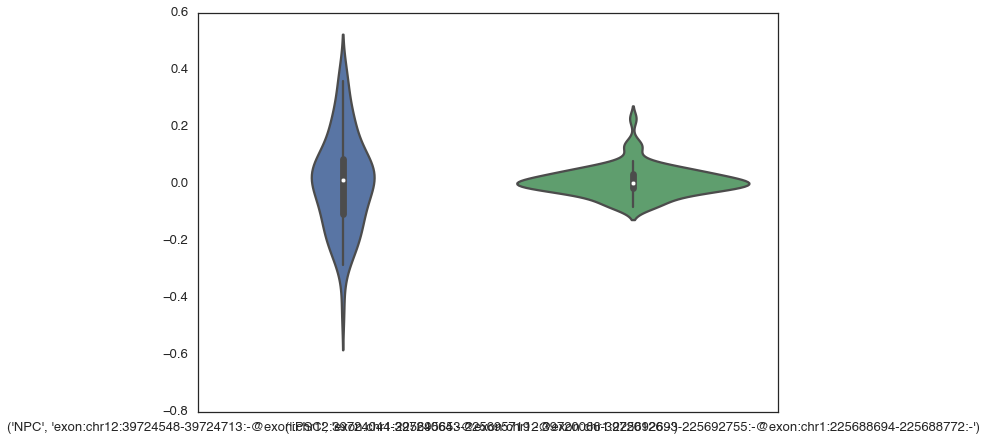

In [181]:
sns.violinplot(coeffs)

In [182]:
kif21a_psi = rbfox2_regulated_events['exon:chr12:39724548-39724713:-@exon:chr12:39724044-39724064:-@exon:chr12:39720066-39720126:-']
kif21a_psi_npc = kif21a_psi.groupby(study.sample_id_to_phenotype).get_group('NPC')
kif21a_psi_npc

sample_id
CVN_06    0.000000
CVN_09    0.000000
CVN_11    1.000000
CVN_13    0.000000
CVN_18    1.000000
CVN_21    1.000000
CVN_26    1.000000
CVN_30    0.171598
N1_03     1.000000
N1_10     1.000000
N2_01     0.000000
N2_02     1.000000
N2_05     1.000000
N2_06     1.000000
N3_03     0.000000
N3_04     1.000000
N3_05     1.000000
N3_10     1.000000
N3_11     0.000000
N4_04     1.000000
Name: exon:chr12:39724548-39724713:-@exon:chr12:39724044-39724064:-@exon:chr12:39720066-39720126:-, dtype: float64

In [185]:
rbfox2_expression_npc = rbps_from_cisbp.groupby(study.sample_id_to_phenotype).get_group('NPC')['RBFOX2']
rbfox2_expression_npc = rbfox2_expression_npc.loc[kif21a_psi_npc.index]
rbfox2_expression_npc

sample_id
CVN_06    6.637808
CVN_09    7.252798
CVN_11    6.382427
CVN_13    7.529923
CVN_18    6.242808
CVN_21    1.109149
CVN_26    1.113672
CVN_30    6.351430
N1_03     8.128461
N1_10     4.090574
N2_01     0.231412
N2_02     8.400649
N2_05     6.606065
N2_06     8.580626
N3_03     6.520517
N3_04     7.016567
N3_05     1.700999
N3_10     1.964295
N3_11     2.854385
N4_04     6.197117
Name: RBFOX2, dtype: float64

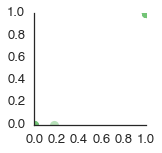

In [192]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(kif21a_psi_npc, kif21a_psi_npc > 0.5, 'o', alpha=0.5, color=study.phenotype_to_color['NPC'])
sns.despine()

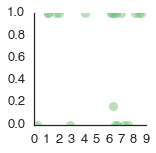

In [193]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(rbfox2_expression_npc, kif21a_psi_npc, 'o', alpha=0.5, color=study.phenotype_to_color['NPC'])
sns.despine()

In [200]:
kif21a_regressor.coef_.shape

(1, 72)

In [203]:
study.splicing.maybe_renamed_to_feature_id('FGFR2')

Index([], dtype='object')

ValueError: Shape of passed values is (72, 1), indices imply (72, 73)

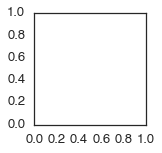

In [202]:
fig, ax = plt.subplots(figsize=(2, 2))


def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(rbps_from_cisbp.groupby(study.sample_id_to_phenotype).get_group('NPC') \
             * kif21a_regressor.coef_ + kif21a_regressor.intercept_).ravel()

ax.plot(rbfox2_expression_npc, loss, color='crimson', linewidth=3)

ax.plot(rbfox2_expression_npc, kif21a_psi_npc > 0.5, 'o', alpha=0.5, color=study.phenotype_to_color['NPC'])
sns.despine()